![title](IMG_20200503_183507.jpg)

$$W_1 = C_m \omega_m - J_m \dot{\omega_m} \omega_m$$

$$W_2 = -F_R V -(N_A + N_P) f_V R \omega_R - 4 J_R \dot{\omega_R} \omega_R - M a V$$

Con $$F_R = \frac{1}{2} \mu C_x A V^2$$

$$N_A + N_P = Mg$$

Moto diretto

$$\eta W_1 + W_2 = 0$$
Con $$\eta$$ coefficiente di trasmissione

$$\omega_R = \tau  \omega_M$$

$$\omega_m = \frac{V}{R\tau}$$
$$\frac{\eta C_M}{R \tau} - \frac{\tau J_M}{R^2 \tau^2} a - F_R - M g f_v - 4 \frac{J_R}{R^2}a- Ma = 0$$

$$a=\frac{\frac{\eta C_M}{\tau} - F_R - Mgf_V}{\eta\frac{J_M}{R^2 \tau^2} + 4\frac{J_R}{R^2} + M}$$

In [72]:
import sympy

In [73]:
M, a, Fr, Jr, R, Jm, A, V, t, m = sympy.symbols("M a Fr Jr R Jm A V t m")

In [74]:
g = 9.81

#Attrito viscoso aria
Cx = 0.4
dens = 1.225

#Attrito volvente ipotesi legno
fv = 0.0015 

# Da macchina a ruota
tau = 1/4

# Ipotesi coeff. di trasmissione
n = 0.9

In [75]:
Cm = (tau/n)*(a*((n*Jm/(R*tau**2)) + 4*Jr/R**2 + M) + Fr + M*g*fv)
Cm

0.277777777777778*Fr + 0.0040875*M + 0.277777777777778*a*(14.4*Jm/R + 4*Jr/R**2 + M)

In [76]:
Cm = Cm.subs(Fr, (0.5 * dens * Cx * A * V))
Cm

0.0680555555555556*A*V + 0.0040875*M + 0.277777777777778*a*(14.4*Jm/R + 4*Jr/R**2 + M)

In [77]:
Cm = Cm.subs(a, V/t)
Cm

0.0680555555555556*A*V + 0.0040875*M + 0.277777777777778*V*(14.4*Jm/R + 4*Jr/R**2 + M)/t

In [78]:
Cm = Cm.subs(Jr, 0.5*m*R**2)
Cm

0.0680555555555556*A*V + 0.0040875*M + 0.277777777777778*V*(14.4*Jm/R + M + 2.0*m)/t

Supponiamo di volere una macchina di 1Kg, con ruote da 0.01 Kg che va da 0 a 100 in 10 secondi, con area frontale di 20 x 5 cm = 100e-4 e raggio 3cm

In [79]:
massaTotale = 1 #Kg
massaRuota = 0.01 #Kg
velocitaDaRaggiungere = 100 #Km/h
inSecondi = 10 #s
area = 100e-4 #m^2
raggioRuota = 3e-2 #m

In [80]:
Cm.evalf().subs({M: massaTotale, m: massaRuota, V: velocitaDaRaggiungere, t: inSecondi, A: area, R:raggioRuota})

1333.33333333333*Jm + 2.90547638888889

In [81]:
from sympy.utilities.lambdify import lambdify

In [82]:
# Coppia necessaria data inerzia motore
coppia = lambdify(Jm, Cm.evalf().subs({M: massaTotale, m: massaRuota, V: velocitaDaRaggiungere, t: inSecondi, A: area, R:raggioRuota}))

In [83]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'coppia')

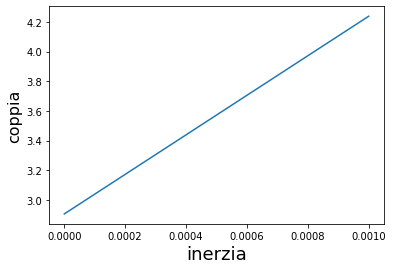

In [84]:
valori_J = np.linspace(0, 1e-3, 2000)
plt.plot(valori_J, coppia(valori_J))
plt.xlabel('inerzia', fontsize=18)
plt.ylabel('coppia', fontsize=16)

https://www.orientalmotor.it/Products/Stepper_motors/Open_loop_stepper_motor_packages/Without_integrated_controller/microstep_cvk/

In [85]:
coppia(3400e-7)

3.3588097222222224

## Calcolo coppia da rpm

In [86]:
def calcola_Cm(RPM, Pm):
    return Pm/(RPM * 2 * np.pi / 60)

In [87]:
RPM = sympy.symbols("RPM")
Pm = sympy.symbols("Pm")

In [88]:
Cm = Pm/(RPM * 2 * sympy.pi / 60)
Cm

30*Pm/(pi*RPM)

Es da motore Amazon:

In [89]:
calcola_Cm(12e3, 60)

0.0477464829275686

In [90]:
PM = sympy.symbols("Cm") * (RPM * 2 * sympy.pi / 60)
PM

pi*Cm*RPM/30

In [91]:
calcola_PM = lambdify(RPM, PM.evalf().subs({Cm:3.3}))

In [92]:
calcola_PM(20e3)*3.3

6911.50383789756*Cm

TypeError: can't convert expression to float

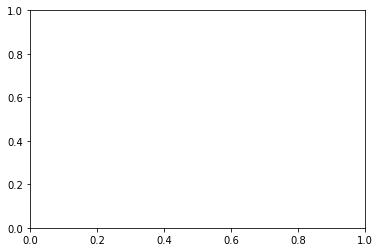

In [93]:
valori_RPM = np.linspace(0, 20e3, 2000)
plt.plot(valori_RPM, calcola_PM(valori_RPM))
plt.xlabel('RPM', fontsize=18)
plt.ylabel('Potenza', fontsize=16)

## Coppia a regime data V di regime:

$$V_0 = \sqrt{\frac{\frac{\eta C_m}{R\tau} - Mgf_v}{1/2*\rho A C_x}}$$

$$C_m = (\frac{V_0^2 \rho A C_x}{2} + Mgf_v) R \frac{\tau}{\eta}$$

In [ ]:
V0 = sympy.sqrt(((n*Cm/(R*tau)) - M*g*fv)/(0.5*dens*A*Cx))
V0

In [ ]:
V0 = sympy.symbols("V0")

In [ ]:
CmRegime = (((V0**2)*dens*A*Cx)/2 + M*g*fv)*R*(tau/n)
CmRegime

In [ ]:
coppia = lambdify(V0, CmRegime.evalf().subs({M: massaTotale, A: area, R:raggioRuota}))

In [ ]:
# Coppia a regime in Nm
coppia(velocitaDaRaggiungere)

https://www.distrelec.it/it/motore-passo-passo-ibrido-1nm-nema-24-trinamic-qsh6018-65-28-210/p/15422354

https://www.orientalmotor.it/Products/Brushless_dc_motors/Dc_input/blh2_analog/?filter1=Stirnradgetriebe&filter2=90+mm

## Verifica di aderenza

In [ ]:
# TODO